In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pickle.load(open('../datasets/data.pickle', 'rb'))
df.rename(columns={"Unnamed: 0": "id_"})
n_resumes = df.shape[0]
emb_len = len(df.iloc[0]['bag_of_words'])
df

,Unnamed: 0,id,start_date,num_month,name,description,sex,birthday,edu_level,num_lang,skills,filename,name_err,name_norm,name_to_fix,bag_of_words,bag_of_words_desc
0,0,1,2010-01-01,61,"механик отдела эксплуатации,ст.мастер РММ","проверка технического состояния ,постановка на...",Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,,механик отдел эксплуатация ст мастер,механик отдел эксплуатация старший мастер,"[-0.042076707, -1.0882155, -0.38035816, -0.589...","[5.654338, -1.2791694, 3.9257607, -4.022504, -..."
1,1,1,2008-05-01,32,оператор асфальтоукладчика,производство и укладка полотна асфальтобетона....,Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,асфальтоукладчик,оператор,оператор асфальтоукладчик,"[-0.020386357, -0.4304574, -0.31297466, -0.512...","[0.47046685, -0.2477055, 0.24117915, -0.472985..."
2,2,1,1996-04-01,145,от слесаря до главного инженера,организация бесперебойной работы производства....,Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,,слесарь главное инженер,слесарь главное инженер,"[-0.18156648, -0.49170238, 0.057426784, 0.2574...","[1.001217, 0.21448779, 0.96711546, -0.687405, ..."
3,3,2,2015-11-01,97,Агроном,"Проверка качества сбора огурца,\r\nРабота с пе...",Мужчина,1994-05-16,3,1,NaN,data/resumes/0022b6c30002332ae80039ed1f3330306...,,агроном,агроном,"[-0.04598738, 0.0077734906, 0.33906132, -0.147...","[0.6523544, 0.6185561, 1.2716287, -0.8732231, ..."
4,4,3,2022-02-01,19,Технолог по мясопереработке,Проведение переговоров с технологами и первыми...,Мужчина,1985-10-03,3,2,"обвалка.организация колбасного производства, К...",data/resumes/b0fec0a900027632fa0039ed1f756f434...,мясопереработка,технолог,технолог мясопереработка,"[0.021680942, 0.12573536, 0.25188488, -0.02121...","[1.8758911, 0.58935714, 0.6345902, 2.4669178, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,1000,2010-09-01,27,Инженер-механик,Организация работы транспортного отдела.Выпуск...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,инженер механик,инженер механик,"[-0.13526846, -0.57611465, -0.3135809, -0.3647...","[7.123074, -4.81759, 1.2117515, -8.2680025, -5..."
4326,4326,1000,2008-04-01,30,Водитель-экспедитор,Обеспечение технически исправное состояние зак...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,водитель экспедитор,водитель экспедитор,"[-0.041988686, -1.1747255, -0.16020232, -0.379...","[2.9840817, -2.9549766, 2.5062642, -4.2517056,..."
4327,4327,1000,2007-10-01,5,Мастер ПО,Организация бесперебойной работы техники за сч...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,мастер,мастер,"[-0.76281834, -0.14530335, -0.26517573, -0.059...","[6.193587, -3.5228848, 9.457505, -19.11328, -8..."
4328,4328,1000,2004-08-01,39,Механик,"Выпуск на линию автотранспорта, оформление и в...",Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,механик,механик,"[-0.020386357, -0.4304574, -0.31297466, -0.402...","[0.87414664, -0.8231784, 0.07308251, -3.598594..."


In [3]:
def distance(chel1, chel2):
    return cosine_distances([chel1['bag_of_words']], [chel2['bag_of_words']])[0, 0]

In [4]:
coords = np.zeros((n_resumes, emb_len))
for i, row in df.iterrows():
    coords[i] = row['bag_of_words'] * 10 + row['bag_of_words_desc']

In [5]:
clustering = AgglomerativeClustering(n_clusters=100).fit(coords)
labels = clustering.labels_

In [6]:
df['cluster'] = pd.Series(labels)

In [7]:

# pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.sort_values('cluster')[["name", "description", "cluster"]].to_csv("file.csv")

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(coords)

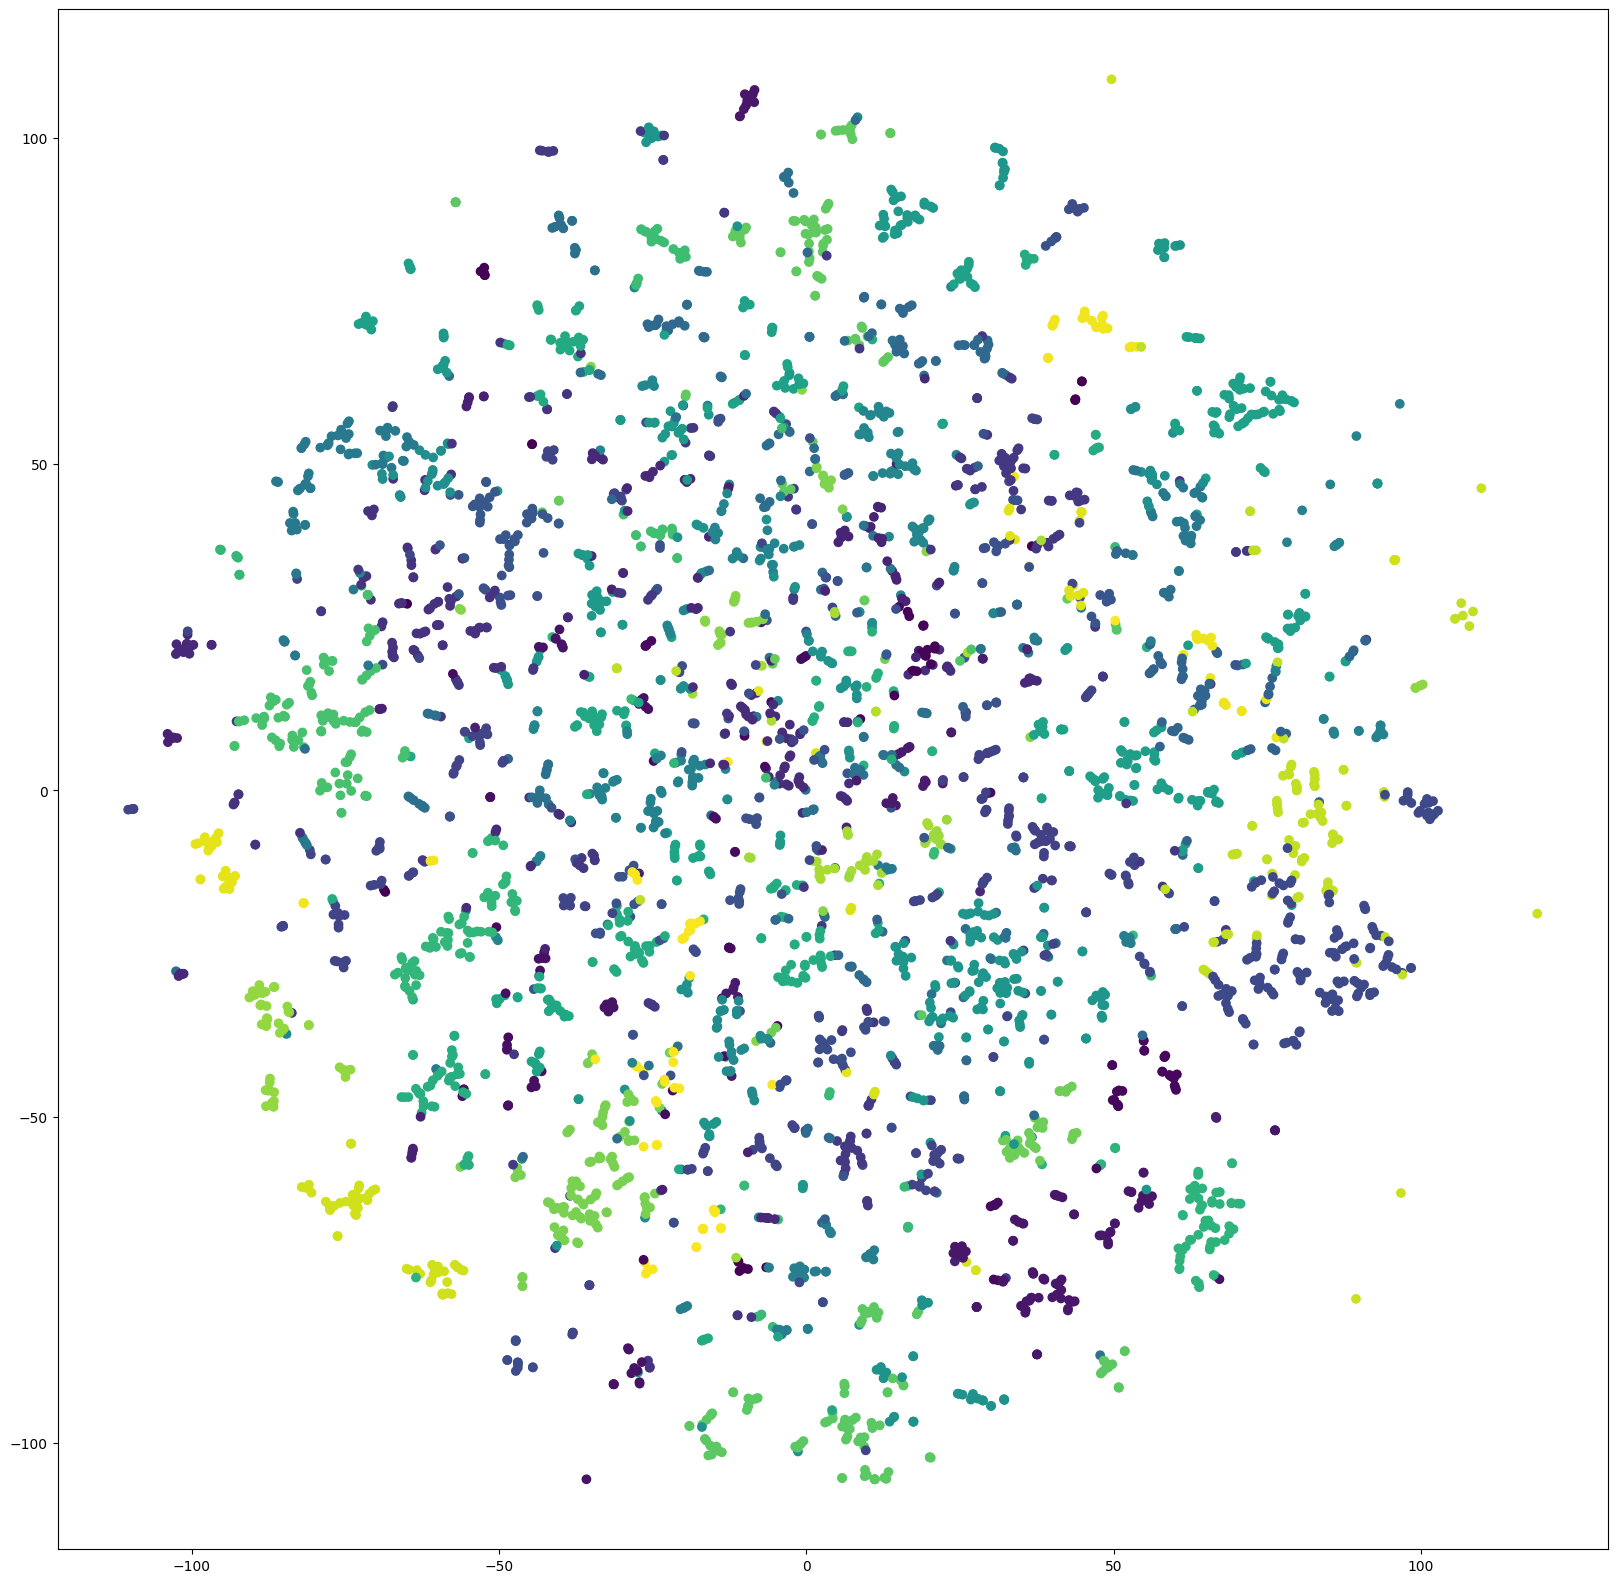

In [9]:
plt.ion()
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['cluster'])


In [10]:
df.groupby("cluster").agg({"name": len})

,name
cluster,
0,24
1,18
2,32
3,27
4,32
...,...
95,25
96,17
97,32


In [12]:
df

,Unnamed: 0,id,start_date,num_month,name,description,sex,birthday,edu_level,num_lang,skills,filename,name_err,name_norm,name_to_fix,bag_of_words,bag_of_words_desc,cluster
0,0,1,2010-01-01,61,"механик отдела эксплуатации,ст.мастер РММ","проверка технического состояния ,постановка на...",Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,,механик отдел эксплуатация ст мастер,механик отдел эксплуатация старший мастер,"[-0.042076707, -1.0882155, -0.38035816, -0.589...","[5.654338, -1.2791694, 3.9257607, -4.022504, -...",12
1,1,1,2008-05-01,32,оператор асфальтоукладчика,производство и укладка полотна асфальтобетона....,Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,асфальтоукладчик,оператор,оператор асфальтоукладчик,"[-0.020386357, -0.4304574, -0.31297466, -0.512...","[0.47046685, -0.2477055, 0.24117915, -0.472985...",77
2,2,1,1996-04-01,145,от слесаря до главного инженера,организация бесперебойной работы производства....,Мужчина,1971-09-30,3,2,NaN,data/resumes/c0bdccb200025d6b190039ed1f4d62637...,,слесарь главное инженер,слесарь главное инженер,"[-0.18156648, -0.49170238, 0.057426784, 0.2574...","[1.001217, 0.21448779, 0.96711546, -0.687405, ...",65
3,3,2,2015-11-01,97,Агроном,"Проверка качества сбора огурца,\r\nРабота с пе...",Мужчина,1994-05-16,3,1,NaN,data/resumes/0022b6c30002332ae80039ed1f3330306...,,агроном,агроном,"[-0.04598738, 0.0077734906, 0.33906132, -0.147...","[0.6523544, 0.6185561, 1.2716287, -0.8732231, ...",70
4,4,3,2022-02-01,19,Технолог по мясопереработке,Проведение переговоров с технологами и первыми...,Мужчина,1985-10-03,3,2,"обвалка.организация колбасного производства, К...",data/resumes/b0fec0a900027632fa0039ed1f756f434...,мясопереработка,технолог,технолог мясопереработка,"[0.021680942, 0.12573536, 0.25188488, -0.02121...","[1.8758911, 0.58935714, 0.6345902, 2.4669178, ...",61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,1000,2010-09-01,27,Инженер-механик,Организация работы транспортного отдела.Выпуск...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,инженер механик,инженер механик,"[-0.13526846, -0.57611465, -0.3135809, -0.3647...","[7.123074, -4.81759, 1.2117515, -8.2680025, -5...",37
4326,4326,1000,2008-04-01,30,Водитель-экспедитор,Обеспечение технически исправное состояние зак...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,водитель экспедитор,водитель экспедитор,"[-0.041988686, -1.1747255, -0.16020232, -0.379...","[2.9840817, -2.9549766, 2.5062642, -4.2517056,...",50
4327,4327,1000,2007-10-01,5,Мастер ПО,Организация бесперебойной работы техники за сч...,Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,мастер,мастер,"[-0.76281834, -0.14530335, -0.26517573, -0.059...","[6.193587, -3.5228848, 9.457505, -19.11328, -8...",63
4328,4328,1000,2004-08-01,39,Механик,"Выпуск на линию автотранспорта, оформление и в...",Мужчина,1980-05-27,3,3,"Автомобильные грузоперевозки, Ремонтные работы...",data/resumes/dc30b54b00015ecd0a0039ed1f48796a5...,,механик,механик,"[-0.020386357, -0.4304574, -0.31297466, -0.402...","[0.87414664, -0.8231784, 0.07308251, -3.598594...",79
